1\. **Pandas DataFrame**

This exercise consists in analyzing a dataset containg timing information from a series of Time-to-Digital-Converters (TDC) implemented in a pair of FPGAs. Each measurement (i.e. each row of the input file) consists of a flag that specifies the type of message ('HEAD', which in this case is always 1), two addresses of the TDC providing the signal ('FPGA' and 'TDC_CHANNEL'), and the timing information ('ORBIT_CNT', 'BX_COUNTER', and 'TDC_MEAS'). Each TDC count corresponds to 25/30 ns, whereas a unit of BX_COUNTER corresponds to 25 ns, and the ORBIT_CNT is increased every `x` BX_COUNTER. This allows to store the time in a similar way to hours, minutes and seconds.

In [ ]:
# If haven't downloaded it yet, please get the data file with wget
#!wget https://www.dropbox.com/s/xvjzaxzz3ysphme/data_000637.txt -P ./data/

1\. Create a Pandas DataFrame reading N rows of the `data/data_000637.txt` dataset. Choose N to be smaller than or equal to the maximum number of rows and larger that 10k (check the documentation).

In [5]:
import pandas as pd
import numpy as np
import csv 

data = pd.read_csv('F:/python/ptthon/data_000637.txt')
print(data.head(1200)) 
print(data.info()) 

      HEAD  FPGA  TDC_CHANNEL   ORBIT_CNT  BX_COUNTER  TDC_MEAS
0        1     0          123  3869200167        2374        26
1        1     0          124  3869200167        2374        27
2        1     0           63  3869200167        2553        28
3        1     0           64  3869200167        2558        19
4        1     0           64  3869200167        2760        25
...    ...   ...          ...         ...         ...       ...
1195     1     0          118  3869200179        1453         5
1196     1     0           36  3869200179        1451        14
1197     1     0           59  3869200179        1440        23
1198     1     1          139  3869200179        1458         0
1199     1     1           14  3869200179        1456         5

[1200 rows x 6 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1310720 entries, 0 to 1310719
Data columns (total 6 columns):
 #   Column       Non-Null Count    Dtype
---  ------       --------------    -----
 0   HEAD  

2\. Estimate the number of BX in a ORBIT (the value `x`).

*Hint*: check when the BX counter reaches the maximum value before being reset to 0.

In [9]:
import pandas as pd
import numpy as np
data = pd.read_csv('F:/python/ptthon/data_000637.txt')
bx = data["BX_COUNTER"]
estimate_bx = max(bx)
print( estimate_bx)

3563


3\. Create a new column with the absolute time in ns (as a combination of the other three columns with timing information) since the beginning of the data acquisition, and convert the new column to a Time Series.

In [10]:
import numpy as np
import pandas as pd
data = pd.read_csv('F:/python/ptthon/data_000637.txt')
bx = data["BX_COUNTER"]
estimate_bx = max(bx)
data["abs_time_in_ns"] = data['TDC_MEAS'].transform(lambda x: x * 25/30) + data['BX_COUNTER'].transform(lambda x: x * 25) +data['ORBIT_CNT'].transform(lambda x: x * estimate_bx * 25)
print(data)

         HEAD  FPGA  TDC_CHANNEL   ORBIT_CNT  BX_COUNTER  TDC_MEAS  \
0           1     0          123  3869200167        2374        26   
1           1     0          124  3869200167        2374        27   
2           1     0           63  3869200167        2553        28   
3           1     0           64  3869200167        2558        19   
4           1     0           64  3869200167        2760        25   
...       ...   ...          ...         ...         ...       ...   
1310715     1     0           62  3869211171         762        14   
1310716     1     1            4  3869211171         763        11   
1310717     1     0           64  3869211171         764         0   
1310718     1     0          139  3869211171         769         0   
1310719     1     0           61  3869211171         762        18   

         abs_time_in_ns  
0          3.446490e+14  
1          3.446490e+14  
2          3.446490e+14  
3          3.446490e+14  
4          3.446490e+14  
...

4\. Find out the duration of the data taking in hours, minutes and seconds, by using the features of the Time Series. Perform this check reading the whole dataset.

In [20]:
import datetime as dt
import numpy as np
import pandas as pd
data = pd.read_csv('F:/python/ptthon/data_000637.txt')
begin_time = dt.datetime.now()
print(begin_time)
time = data['TDC_MEAS'] *(25/30) + data['BX_COUNTER'] * 25 + data['ORBIT_CNT']*estimate_bx*25
end_time = dt.datetime.now()
print(end_time)
print((end_time - begin_time))

2022-12-12 15:22:09.150976
2022-12-12 15:22:09.669843
0:00:00.518867


5\. Use the `.groupby()` method to find out the noisy channels, i.e. the TDC channels with most counts (print to screen the top 3 and the corresponding counts)

In [15]:
import numpy as np
import pandas as pd
data = pd.read_csv('F:/python/ptthon/data_000637.txt')
x=  data.groupby('TDC_CHANNEL').sum().sort_values(by = ['HEAD']).iloc[-3:]
print(x)

               HEAD   FPGA        ORBIT_CNT  BX_COUNTER  TDC_MEAS
TDC_CHANNEL                                                      
63            64642    918  250113227630194   115482430    938192
64            66020   1439  255444994368975   117767051    962195
139          108059  32442  418102549486957   192477704         0


6\. Count the number of non-empty orbits (i.e. the number of orbits with at least one hit).

In [16]:
import numpy as np
import pandas as pd
data = pd.read_csv('F:/python/ptthon/data_000637.txt')
count_num = data.ORBIT_CNT.unique().size
print(str(count_num))

11001


7\. Count the number of unique orbits with at least one measurement from TDC_CHANNEL=139.

In [17]:
import numpy as np
import pandas as pd
data = pd.read_csv('F:/python/ptthon/data_000637.txt')
unique_orbits = pd.DataFrame(data[data['TDC_CHANNEL'] == 139]).drop_duplicates(subset=['ORBIT_CNT'], inplace=False)
print(len(unique_orbits))

10976


8\. Create two Series (one for each FPGA) that have the TDC channel as index, and the number of counts for the corresponding TDC channel as values.

In [18]:
import numpy as np
import pandas as pd
data = pd.read_csv('F:/python/ptthon/data_000637.txt')
FPGA_0 = pd.Series(data[data['FPGA'] == 0]['TDC_CHANNEL'].value_counts())
FPGA_1 = pd.Series(data[data['FPGA'] == 1]['TDC_CHANNEL'].value_counts())
print(FPGA_0)
print(FPGA_1)

139    75617
64     64581
63     63724
61     48699
62     48275
       ...  
130       33
137       32
30         4
129        2
39         1
Name: TDC_CHANNEL, Length: 124, dtype: int64
2      32669
139    32442
1      28438
4      26403
3      21970
       ...  
9         80
130       38
138       36
137       36
129       35
Name: TDC_CHANNEL, Length: 132, dtype: int64


9\. **Optional:** Create two histograms (one for each FPGA) that show the number of counts for each TDC channel.

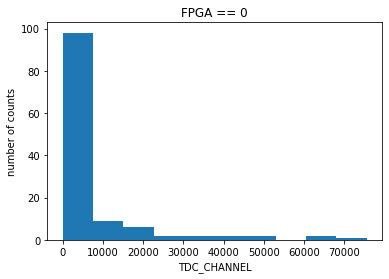

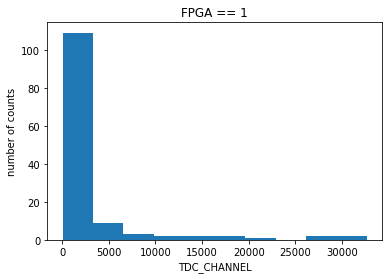

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv 
data = pd.read_csv('F:/python/ptthon/data_000637.txt')
FPGA_0 = pd.Series(data[data['FPGA'] == 0]['TDC_CHANNEL'].value_counts())
FPGA_1 = pd.Series(data[data['FPGA'] == 1]['TDC_CHANNEL'].value_counts())
plt.hist(FPGA_0)
plt.title('FPGA == 0')
plt.xlabel('TDC_CHANNEL')
plt.ylabel('number of counts')
plt.show()
plt.hist(FPGA_1)
plt.title('FPGA == 1')
plt.xlabel('TDC_CHANNEL')
plt.ylabel('number of counts')
plt.show()